# Quick Decline Curve Visualization

This notebook shows you the Arps decline curves from your CSV analysis.

In [6]:
# Setup
import sys
sys.path.insert(0, '.')

import pandas as pd
import matplotlib.pyplot as plt
from AnalyticsAndDBScripts.csv_loader import CSVDataLoader
from AnalyticsAndDBScripts.visualization_utils import plot_decline_curve, plot_comparison

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Ready to visualize!")

✅ Ready to visualize!


In [7]:
# Load your data
csv_loader = CSVDataLoader('sample_production_data.csv', 'sample_well_list.csv')
results_df = pd.read_csv('test_results.csv')

print(f"Loaded {len(results_df)} fitted wells:")
display(results_df[['WellID', 'Measure', 'Q3', 'Dei', 'b_factor', 'R_squared']])

Loaded 6 fitted wells:


,WellID,Measure,Q3,Dei,b_factor,R_squared
0,12345678901,GAS,17.276982,0.166511,0.900000,0.957615
1,12345678901,OIL,5.568214,0.202369,0.700000,0.961703
2,12345678901,WATER,1.996719,0.080000,0.700000,0.977100
3,98765432109,GAS,17.618338,0.152651,0.900000,0.968616
4,98765432109,OIL,5.819365,0.224620,0.700000,0.984996
5,98765432109,WATER,2.053596,0.080000,0.701542,0.948807


## Plot Individual Well - GAS

Loading production data from sample_production_data.csv...
  Found 132 records
  Final dataset: 132 records
  Wells: 2
  Date range: 2023-01-01 00:00:00 to 2024-10-01 00:00:00
  Measures: {'GAS': 44, 'OIL': 44, 'WATER': 44}


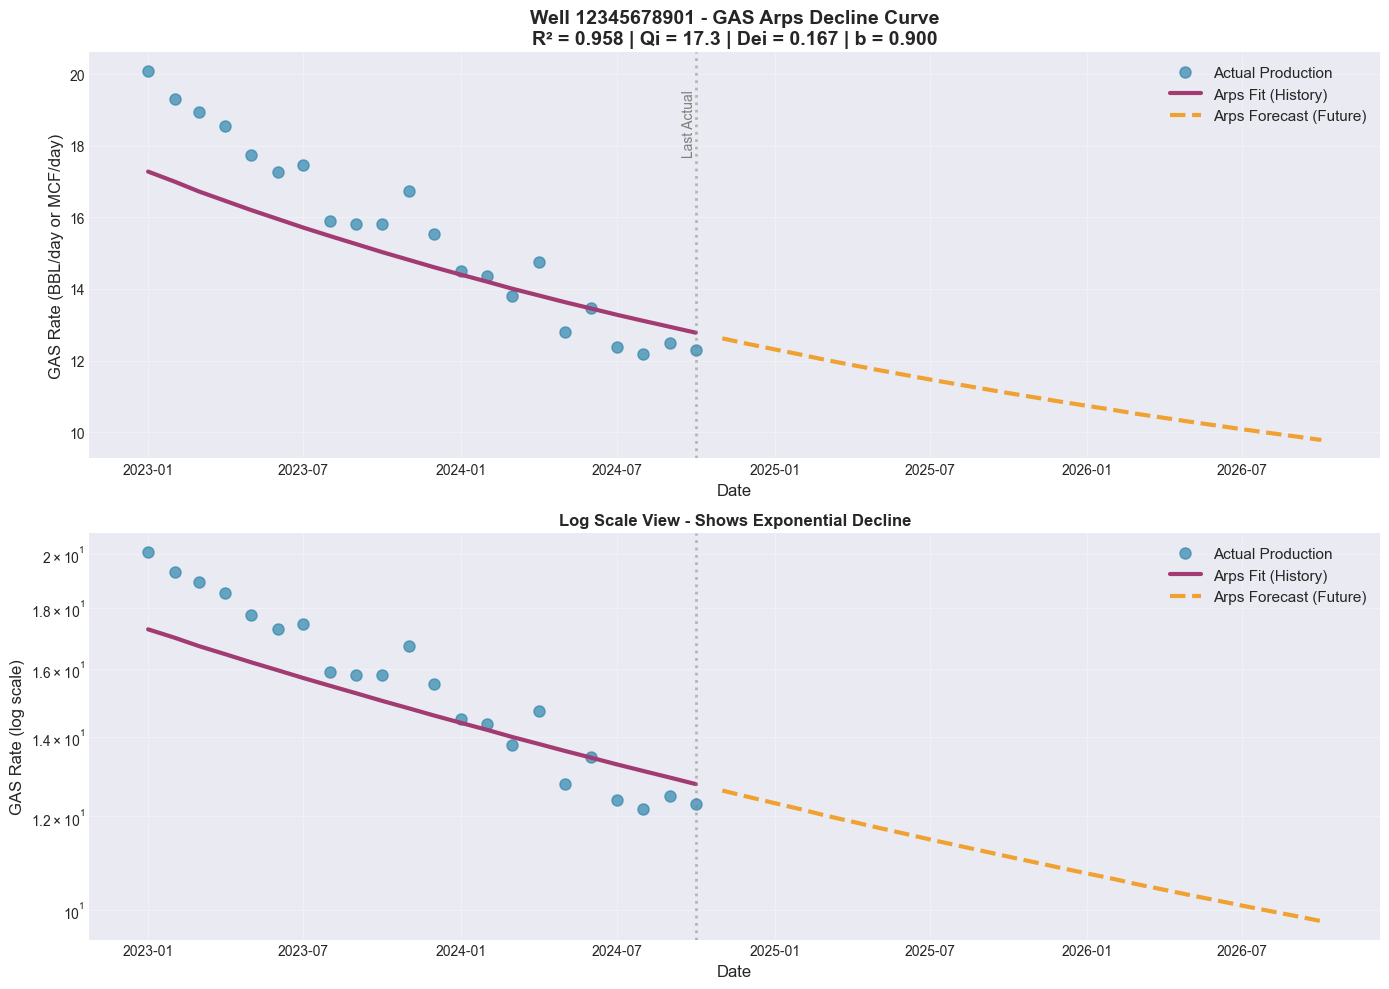


📊 Well 12345678901 - GAS
   Qi (Initial Rate): 17.28 MCF/day
   Dei (Initial Decline): 16.7% per year
   b-factor: 0.900
   R²: 0.958


In [8]:
# Select first well (GAS)
result_row = results_df[results_df['Measure'] == 'GAS'].iloc[0]
wellid = int(result_row['WellID'])
measure = result_row['Measure']

# Get actual production data
actual_data = csv_loader.get_well_production(
    wellid=wellid,
    measure=measure,
    last_prod_date=pd.Timestamp('2024-10-01'),
    fit_months=60
)

# Plot
fig = plot_decline_curve(actual_data, result_row, forecast_months=24)
plt.show()

print(f"\n📊 Well {wellid} - {measure}")
print(f"   Qi (Initial Rate): {result_row['Q3']:.2f} MCF/day")
print(f"   Dei (Initial Decline): {result_row['Dei']:.1%} per year")
print(f"   b-factor: {result_row['b_factor']:.3f}")
print(f"   R²: {result_row['R_squared']:.3f}")

## Plot Individual Well - OIL

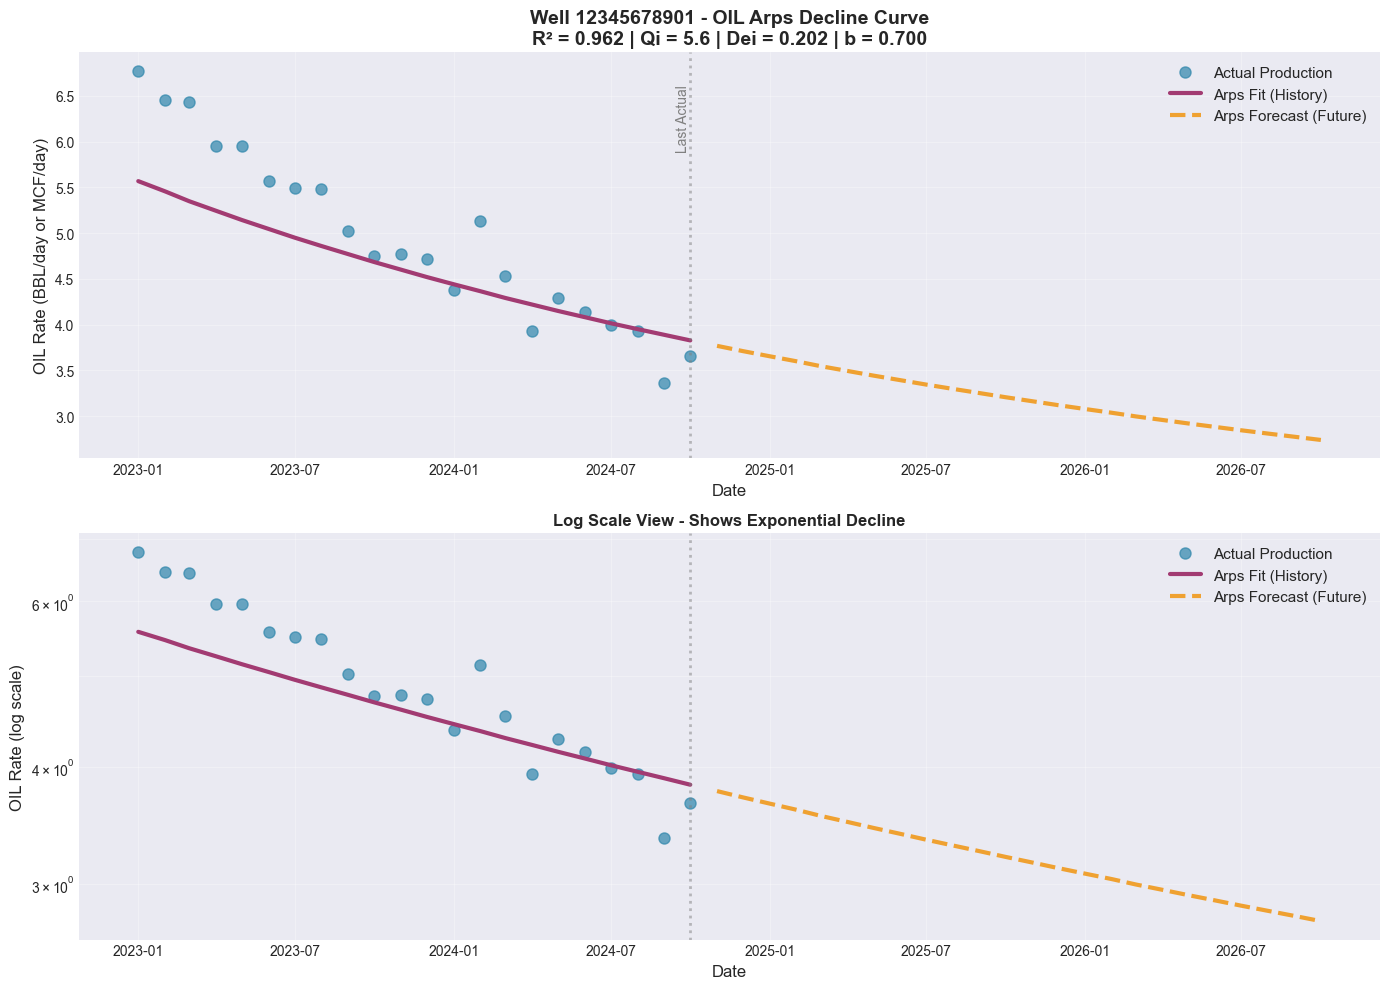


📊 Well 12345678901 - OIL
   Qi: 5.57 BBL/day
   Dei: 20.2% per year
   b-factor: 0.700
   R²: 0.962


In [9]:
# Select OIL
result_row = results_df[results_df['Measure'] == 'OIL'].iloc[0]
wellid = int(result_row['WellID'])
measure = result_row['Measure']

actual_data = csv_loader.get_well_production(
    wellid=wellid,
    measure=measure,
    last_prod_date=pd.Timestamp('2024-10-01'),
    fit_months=60
)

fig = plot_decline_curve(actual_data, result_row, forecast_months=24)
plt.show()

print(f"\n📊 Well {wellid} - {measure}")
print(f"   Qi: {result_row['Q3']:.2f} BBL/day")
print(f"   Dei: {result_row['Dei']:.1%} per year")
print(f"   b-factor: {result_row['b_factor']:.3f}")
print(f"   R²: {result_row['R_squared']:.3f}")

## Compare All Products for One Well

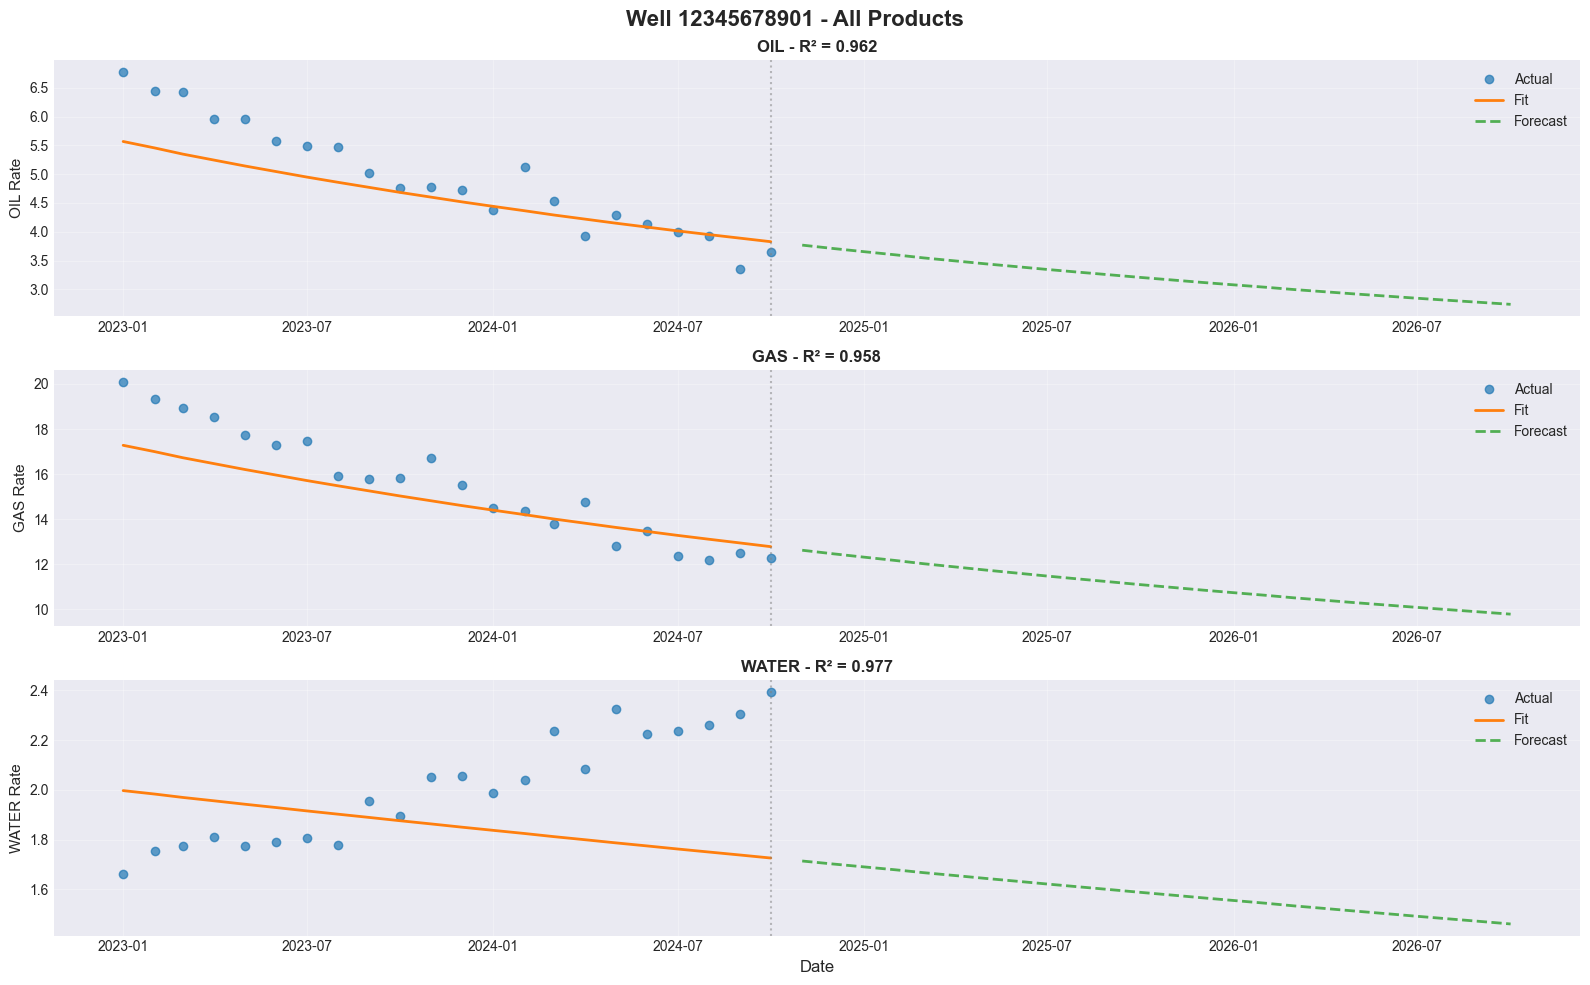


✅ Showing all products for Well 12345678901


In [10]:
# Plot OIL, GAS, and WATER together
wellid = int(results_df['WellID'].iloc[0])

fig = plot_comparison(csv_loader, results_df, wellid)
plt.show()

print(f"\n✅ Showing all products for Well {wellid}")

## Summary Statistics

In [ ]:
print("\n📈 Fit Quality Summary:")
print(f"   Average R²: {results_df['R_squared'].mean():.3f}")
print(f"   Min R²: {results_df['R_squared'].min():.3f}")
print(f"   Max R²: {results_df['R_squared'].max():.3f}")
print(f"\n   Wells with R² > 0.9: {(results_df['R_squared'] > 0.9).sum()} / {len(results_df)}")

print("\n📊 By Product:")
for measure in ['OIL', 'GAS', 'WATER']:
    subset = results_df[results_df['Measure'] == measure]
    if len(subset) > 0:
        print(f"   {measure}: Avg R² = {subset['R_squared'].mean():.3f}")